In [2]:
'''
Data from https://www.kaggle.com/leonardopena/top50spotify2019

Learning -- categorical data -- https://www.formpl.us/blog/categorical-data#:~:text=Categorical%20data%20is%20a%20collection,is%20referred%20to%20as%20categorical.

Investigating seaborn package
'''

'\nData from https://www.kaggle.com/leonardopena/top50spotify2019\n\nLearning -- categorical data -- https://www.formpl.us/blog/categorical-data#:~:text=Categorical%20data%20is%20a%20collection,is%20referred%20to%20as%20categorical.\n\nInvestigating seaborn package\n'

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import squarify

%matplotlib inline
#%matplotlib widget 

#with open("top50.csv") as f:
#    print(f.encoding)

df = pd.read_csv('top50.csv', encoding='cp1252')

In [28]:
df

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [5]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 14.8 KB


In [2]:
del df['Unnamed: 0']  # delete column using delete keyword

In [7]:
df.set_index(df['Track.Name'], inplace=True)

In [8]:
#df.sort_values(by=['Energy'],ascending = False)

In [9]:
df[df['Genre'] == 'pop']
np.unique(df['Genre'])

array(['atl hip hop', 'australian pop', 'big room', 'boy band', 'brostep',
       'canadian hip hop', 'canadian pop', 'country rap', 'dance pop',
       'dfw rap', 'edm', 'electropop', 'escape room', 'latin',
       'panamanian pop', 'pop', 'pop house', 'r&b en espanol',
       'reggaeton', 'reggaeton flow', 'trap music'], dtype=object)

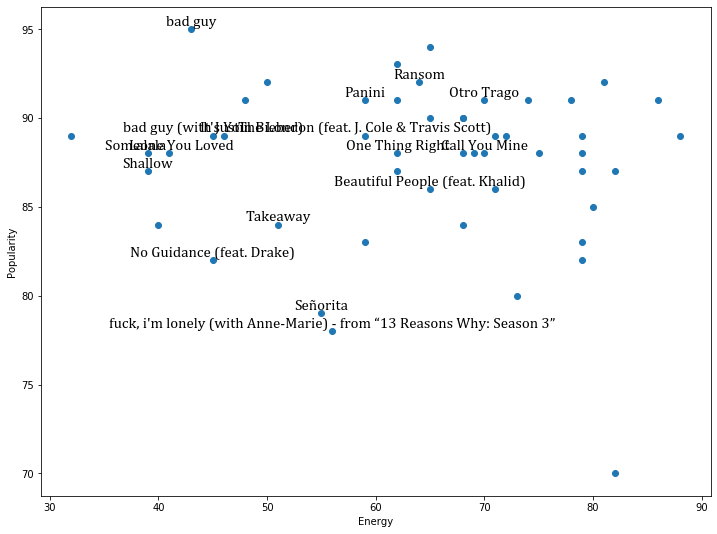

In [42]:
xs=df['Energy']
ys=df['Popularity']
label=df['Track_name']

plt.figure(figsize=(12,9))
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.scatter(xs,ys)

for i, txt in enumerate(label):
    if i % 3 == 0:
        plt.annotate(txt,
                    (xs[i], ys[i]),
                     textcoords="offset points",
                     xytext=(0,4),
                     ha='center',
                    fontsize=15, family = "cambria")

In [11]:
df.reset_index(drop = True, inplace = True)

In [3]:
#df.groupby(df['Artist.Name']).size()
df.rename(columns={'Track.Name':'Track_name','Artist.Name':'Artist_name','Beats.Per.Minute':'Beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)

In [13]:
df.corr().style.background_gradient(cmap='Blues').format("{:.2f}")

,Beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Beats_per_minute,1.00,0.04,-0.09,0.02,-0.17,-0.01,-0.14,-0.03,0.56,0.20
Energy,0.04,1.00,0.02,0.67,0.16,0.44,0.22,-0.34,-0.09,-0.08
Danceability,-0.09,0.02,1.00,0.02,-0.15,0.17,-0.00,-0.10,-0.10,-0.07
Loudness(dB),0.02,0.67,0.02,1.00,0.26,0.24,0.22,-0.14,-0.27,-0.04
Liveness,-0.17,0.16,-0.15,0.26,1.00,0.02,0.13,0.02,-0.13,0.09
Valence,-0.01,0.44,0.17,0.24,0.02,1.00,-0.02,-0.05,-0.05,-0.32
Length,-0.14,0.22,-0.00,0.22,0.13,-0.02,1.00,-0.08,0.05,-0.09
Acousticness,-0.03,-0.34,-0.10,-0.14,0.02,-0.05,-0.08,1.00,0.01,-0.03
Speechiness,0.56,-0.09,-0.10,-0.27,-0.13,-0.05,0.05,0.01,1.00,0.24
Popularity,0.20,-0.08,-0.07,-0.04,0.09,-0.32,-0.09,-0.03,0.24,1.00


In [4]:
df.isnull().sum()

Track_name          0
Artist_name         0
Genre               0
Beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [15]:
df.describe()

,Beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [16]:
df['Artist_name'].values.tolist()

['Shawn Mendes',
 'Anuel AA',
 'Ariana Grande',
 'Ed Sheeran',
 'Post Malone',
 'Ed Sheeran',
 'Lil Tecca',
 'Sam Smith',
 'Lil Nas X',
 'Billie Eilish',
 'Bad Bunny',
 'DJ Snake',
 'Lewis Capaldi',
 'Sech',
 'Drake',
 'Chris Brown',
 'J Balvin',
 'Post Malone',
 'Y2K',
 'Lizzo',
 'MEDUZA',
 'Lil Nas X',
 'Jhay Cortez',
 'Lunay',
 'Billie Eilish',
 'Shawn Mendes',
 'Tones and I',
 'Ali Gatie',
 'Daddy Yankee',
 'J Balvin',
 'The Chainsmokers',
 'Ariana Grande',
 'Maluma',
 'Young Thug',
 'Katy Perry',
 'Martin Garrix',
 'Sech',
 'Ed Sheeran',
 'Jonas Brothers',
 'Lauv',
 'Kygo',
 'Taylor Swift',
 'Lady Gaga',
 'Khalid',
 'ROSALÍA',
 'Marshmello',
 'Nicky Jam',
 'Marshmello',
 'The Chainsmokers',
 'Ed Sheeran']

In [17]:
df.groupby('Genre').size()

Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64

Text(0.5, 1.0, 'Popularity vs. Loudness (dB)')

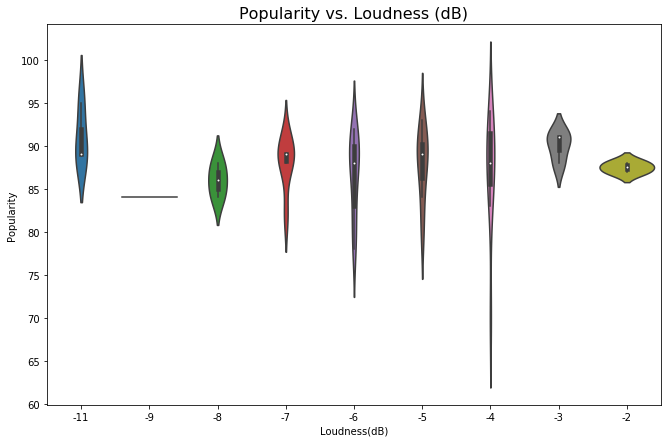

In [18]:
plt.figure(figsize=(11,7))
sns.violinplot(x='Loudness(dB)', y='Popularity', data=df)
plt.xlabel('Loudness(dB)')
plt.ylabel('Popularity')
plt.title("Popularity vs. Loudness (dB)", fontsize=16)

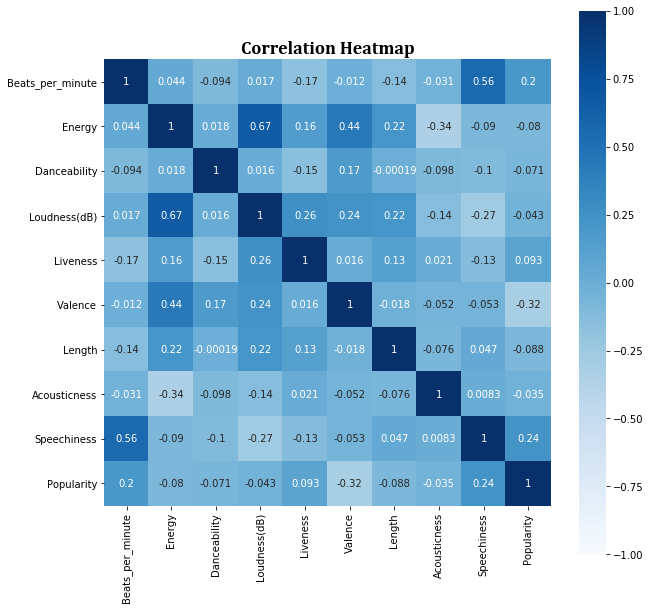

In [43]:
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold',family = "cambria")
sns.heatmap(df.corr(), annot = True, cmap="Blues", vmin=-1,vmax=1,center=0,square=True)

Text(0, 0.5, 'Energy')

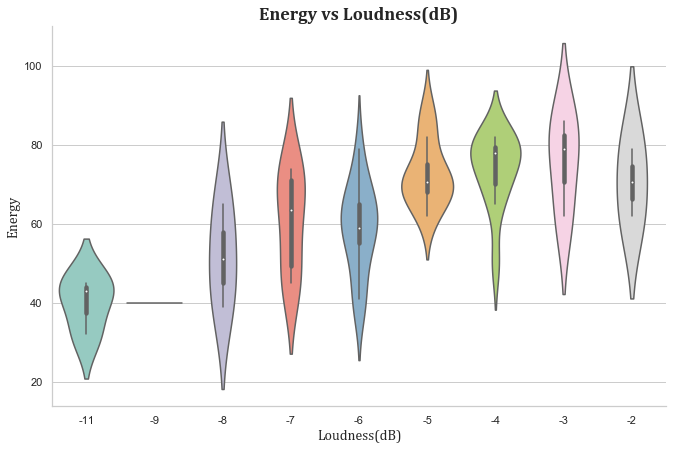

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize = (11,7))
sns.violinplot(x='Loudness(dB)', y='Energy', data=df,spit = False, linewidth=1.5, 
              palette = "Set3")

sns.despine()

plt.title('Energy vs Loudness(dB)', fontsize=18, fontweight='bold',family = "cambria")
plt.xlabel("Loudness(dB)",size = 14,family = "cambria")
plt.ylabel("Energy",size = 14,family = "cambria")

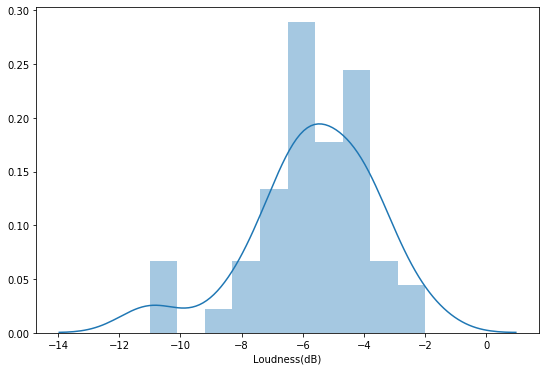

In [18]:
plt.figure(figsize = (9,6))
sns.set_style({"axes.grid": False})
sns.distplot(df, col="time",bins=10, kde=True)
plt.show()

In [40]:
df2 = pd.melt(df, id_vars=['Track_name','Artist_name','Genre'])

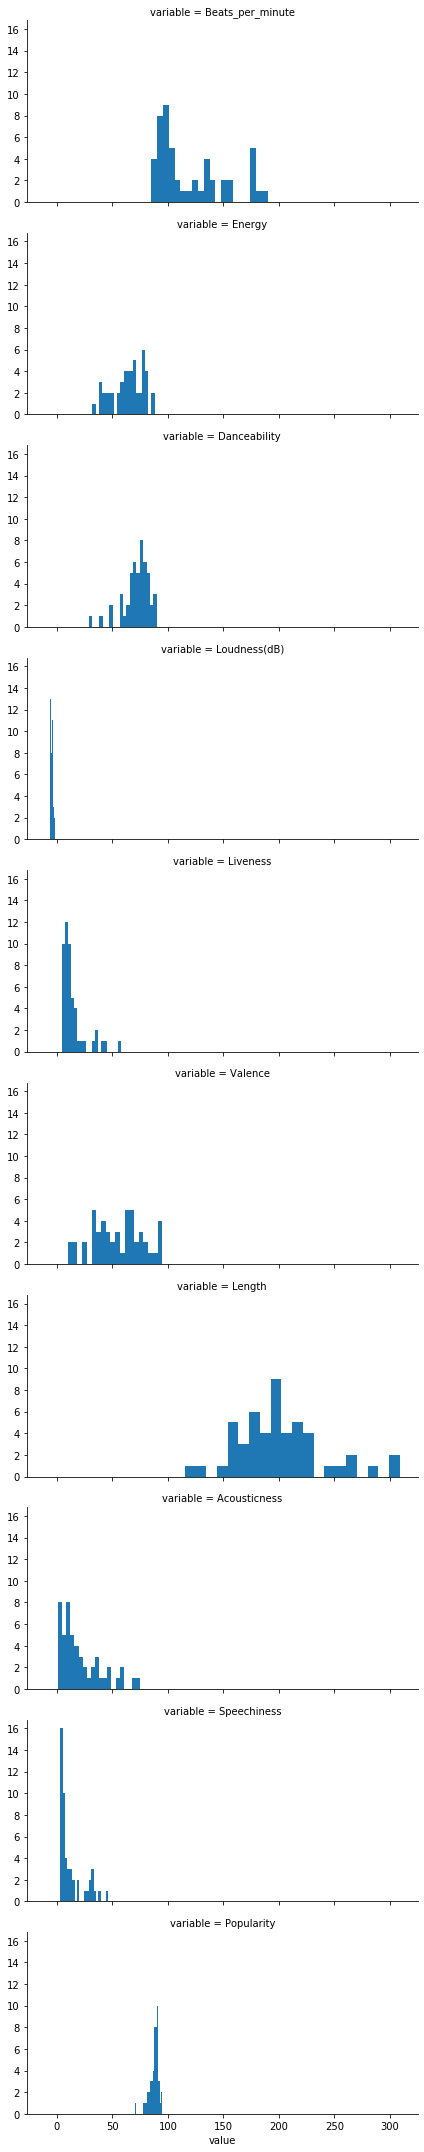

In [49]:
g = sns.FacetGrid(df2, col="variable", col_wrap = True, 
                  palette="Set1", aspect=2)
g.map(plt.hist, 'value', bins = 20)

#g.axes[-1].legend()
plt.show()

In [33]:
df2

,Track_name,Artist_name,Genre,variable,value
0,Señorita,Shawn Mendes,canadian pop,Beats_per_minute,117
1,China,Anuel AA,reggaeton flow,Beats_per_minute,105
2,boyfriend (with Social House),Ariana Grande,dance pop,Beats_per_minute,190
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,Beats_per_minute,93
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,Beats_per_minute,150
...,...,...,...,...,...
495,One Thing Right,Marshmello,brostep,Popularity,88
496,Te Robaré,Nicky Jam,latin,Popularity,88
497,Happier,Marshmello,brostep,Popularity,88
498,Call You Mine,The Chainsmokers,edm,Popularity,88


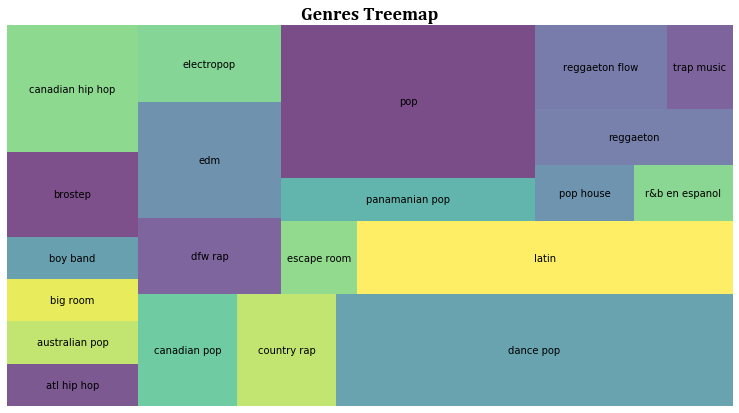

In [45]:
plt.figure(figsize = (13,7))
squarify.plot(label = np.unique(df['Genre']), sizes = df.groupby('Genre')['Track_name'].count(), 
              alpha=0.7)
plt.title("Genres Treemap",fontsize=18, fontweight='bold',family = "cambria")
plt.axis('off')
plt.show()

In [13]:
np.unique(df['Genre'])

array(['atl hip hop', 'australian pop', 'big room', 'boy band', 'brostep',
       'canadian hip hop', 'canadian pop', 'country rap', 'dance pop',
       'dfw rap', 'edm', 'electropop', 'escape room', 'latin',
       'panamanian pop', 'pop', 'pop house', 'r&b en espanol',
       'reggaeton', 'reggaeton flow', 'trap music'], dtype=object)